### Import Libraries and load Dataset

In [1]:
### Need To install Sweetviz before running the code.

# If sweetviz is not installed run the below command

#pip install sweetviz

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
house=pd.read_csv('train.csv')

## Step 1. EDA

In [4]:
pd.set_option('display.max_columns', None) 

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- As seen from above there are a number of attributes with Null values. Some of the columns need to be dropped as they have more than 45% of Null values. 
- Moreover there are a number of columns that are numeric but in actual need to be converted to object type as those are categorical in nature as seen from columns description.

In [6]:
house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [7]:
house.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

**Checking for Null Values and dropping the columns with large number of null values**

In [8]:
house[house.columns[house.isnull().any()]].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
house[house.columns[house.isnull().any()]].isnull().sum()/len(house) *100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

Checking for Columns with categorical values as **NA**. We wont drop these columns since as per the column description there are NA values that has some sepecfic meaning so we need to fill the missing values. 

- Basement variables have almost same percentage of missing values. These to be set as No_Bsmt
- Garage variables have same number of missing values. GarageYrBlt to be set as YearBuilt. All others set as No_Garage
- Masonary Variable have same number of missing values. MasVnrType missing value to be set to None and MasVnrArea to be set as 0
- LotFrontage would depend on dwelling type and dwelling zone. Mean would be taken to assing the values to LotFrontage
- Electrical - Mode value would be substituted with mode of the columns
- Alley will be set as No, MiscFeature to be set as None, PoolQC to be set as No, FireplaceQu to be set as No, Fence to be set as No

In [10]:
house['Electrical'].value_counts(normalize=True)

SBrkr    0.914325
FuseA    0.064428
FuseF    0.018506
FuseP    0.002056
Mix      0.000685
Name: Electrical, dtype: float64

In [11]:
house.groupby(['MSSubClass','MSZoning'])['LotFrontage'].transform(lambda x: x.fillna(x.mean())).head(10).round()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7    82.0
8    51.0
9    50.0
Name: LotFrontage, dtype: float64

In [12]:
house['BsmtQual'].fillna('No', inplace=True)
house['BsmtCond'].fillna('NA', inplace=True)
house['BsmtExposure'].fillna('NA', inplace=True)
house['BsmtFinType1'].fillna('NA', inplace=True)
house['BsmtFinType2'].fillna('NA', inplace=True)
house['GarageType'].fillna('NA', inplace=True)
house['GarageYrBlt'].fillna(-1, inplace=True)
house['GarageFinish'].fillna('NA', inplace=True)
house['GarageQual'].fillna('NA', inplace=True)
house['GarageCond'].fillna('NA', inplace=True)
house['MasVnrType'].fillna('None', inplace=True)
house['MasVnrArea'].fillna(0, inplace=True)
house['Electrical'].fillna('SBrkr', inplace=True)
house['LotFrontage']= house.groupby(['MSSubClass','MSZoning'])['LotFrontage'].transform(lambda x: x.fillna(x.mean())).round()
house['Alley'].fillna('No', inplace=True)
house['MiscFeature'].fillna('None', inplace=True)
house['PoolQC'].fillna('No', inplace=True)
house['FireplaceQu'].fillna('No', inplace=True)
house['Fence'].fillna('No', inplace=True)

In [13]:
house[house.columns[house.isnull().any()]].isnull().sum()/len(house) *100

Series([], dtype: float64)

**Null Values are handled**

Using **SweetViz** to perform Auto EDA on all columns. We need to check the distribution of data per columns.

In [14]:
import sweetviz as sv

my_report = sv.analyze(house)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Drop Columns**

The below categorical columns would be dropped as these columns have a distribution of 90% and more for a particular value as seen from SweetViz Report. Certainly they would not add value so we would drop them

'Utilities', 'Heating', 'RoofMatl', 'LandSlope', 'Condition2', 'CentralAir', 'Electrical', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional',  'GarageCond', 'PavedDrive',  'Alley', 'PoolQC', 'MiscFeature'

In [15]:
col =['Utilities', 'Heating',  'RoofMatl', 'LandSlope', 'Condition2', 'CentralAir', 'Electrical',  'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive',   'Alley', 'PoolQC', 'MiscFeature']

In [16]:
# Get the First record of value_counts for all the above columns to get the verify the frequency of each varaible
for i in col:
    print(i)
    print(house[i].value_counts(normalize=True).mul(100).reset_index().head(1))
    print()

Utilities
    index  Utilities
0  AllPub  99.931507

Heating
  index    Heating
0  GasA  97.808219

RoofMatl
     index   RoofMatl
0  CompShg  98.219178

LandSlope
  index  LandSlope
0   Gtl  94.657534

Condition2
  index  Condition2
0  Norm   98.972603

CentralAir
  index  CentralAir
0     Y   93.493151

Electrical
   index  Electrical
0  SBrkr   91.438356

BsmtHalfBath
   index  BsmtHalfBath
0      0     94.383562

KitchenAbvGr
   index  KitchenAbvGr
0      1     95.342466

Functional
  index  Functional
0   Typ   93.150685

GarageCond
  index  GarageCond
0    TA   90.821918

PavedDrive
  index  PavedDrive
0     Y   91.780822

Alley
  index      Alley
0    No  93.767123

PoolQC
  index     PoolQC
0    No  99.520548

MiscFeature
  index  MiscFeature
0  None     96.30137



In [17]:
house.drop(col,axis=1, inplace=True)

In [18]:
# Dropping ID column too
house.drop('Id',axis=1,inplace=True)

#### High number of categorical columns

As per the SweetViz report the below columns have large number of categories where a few categories are most dominant have almost 85-95% distribution.

'HouseStyle', 'Exterior1st', 'Exterior2nd',  'EnclosedPorch', 'SaleType', 'Condition1', 'BedroomAbvGr', 'GarageType', 'GarageQual'

***The other catogories in these columns would be merged into one category 'Others'***

In [19]:
column = ['HouseStyle', 'Exterior1st', 'Exterior2nd',   'SaleType', 'Condition1', 'BedroomAbvGr', 'GarageType',
         'GarageQual']

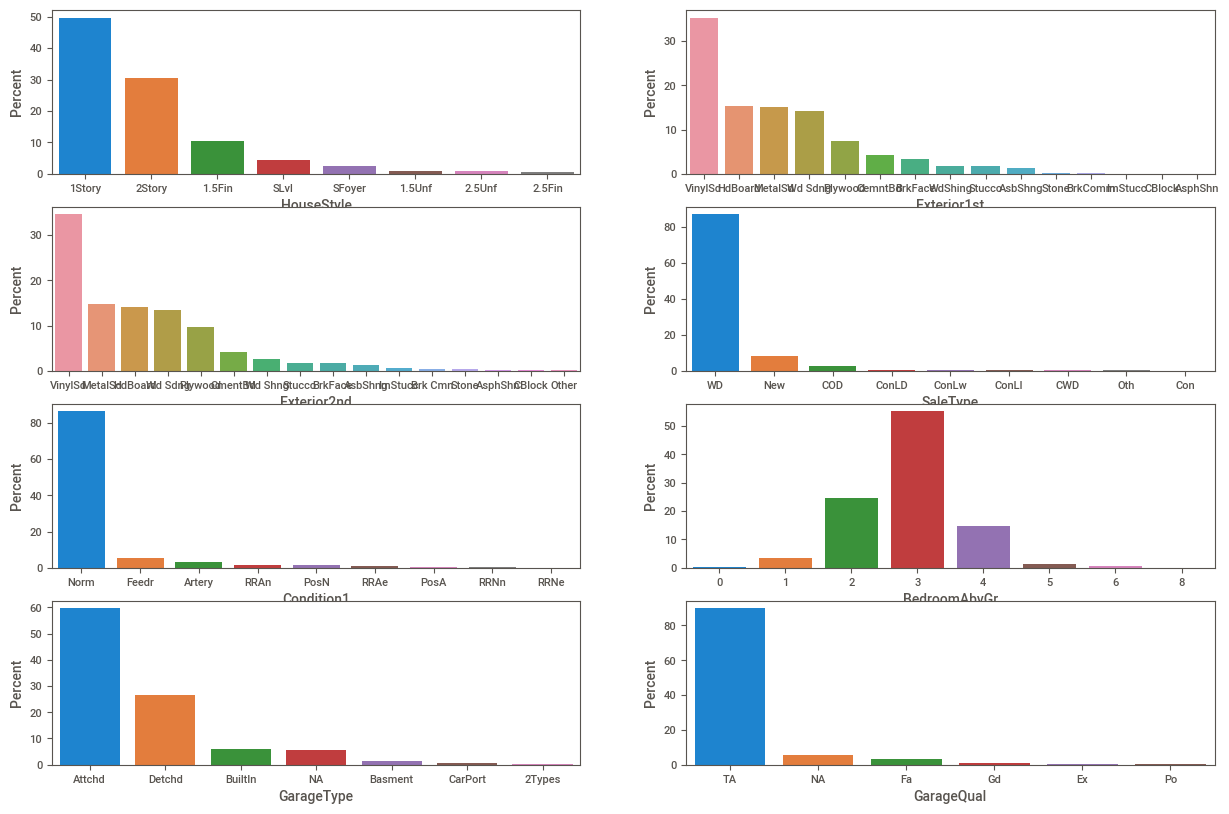

In [20]:
plt.figure(figsize=[15,10])
for i,col in enumerate(column):
    plt.subplot(4,2,i+1)
    res=house[col].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
    sns.barplot(data=res, x='index', y='Percent' )
    plt.xlabel(col)
plt.show()

In [21]:
for i,col in enumerate(column):
    print(col)
    print(house[col].value_counts(normalize=True).mul(100).rename('Percent').reset_index())
    print()

HouseStyle
    index    Percent
0  1Story  49.726027
1  2Story  30.479452
2  1.5Fin  10.547945
3    SLvl   4.452055
4  SFoyer   2.534247
5  1.5Unf   0.958904
6  2.5Unf   0.753425
7  2.5Fin   0.547945

Exterior1st
      index    Percent
0   VinylSd  35.273973
1   HdBoard  15.205479
2   MetalSd  15.068493
3   Wd Sdng  14.109589
4   Plywood   7.397260
5   CemntBd   4.178082
6   BrkFace   3.424658
7   WdShing   1.780822
8    Stucco   1.712329
9   AsbShng   1.369863
10    Stone   0.136986
11  BrkComm   0.136986
12  ImStucc   0.068493
13   CBlock   0.068493
14  AsphShn   0.068493

Exterior2nd
      index    Percent
0   VinylSd  34.520548
1   MetalSd  14.657534
2   HdBoard  14.178082
3   Wd Sdng  13.493151
4   Plywood   9.726027
5   CmentBd   4.109589
6   Wd Shng   2.602740
7    Stucco   1.780822
8   BrkFace   1.712329
9   AsbShng   1.369863
10  ImStucc   0.684932
11  Brk Cmn   0.479452
12    Stone   0.342466
13  AsphShn   0.205479
14   CBlock   0.068493
15    Other   0.068493

SaleType
   in

In [22]:
house['HouseStyle']= house['HouseStyle'].replace(['SLvl','SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
house['Exterior1st']= house['Exterior1st'].replace(['BrkFace','BrkFace','WdShing','Stucco','AsbShng', 'BrkComm', 'Stone', 'AsphShn', 'CBlock', 'ImStucc' ],'Others')
house['Exterior2nd']= house['Exterior2nd'].replace(['CmentBd', 'Wd Shng', 'Stucco', 'BrkFace', 'AsbShng', 'ImStucc', 'Brk Cmn', 'Stone', 'AsphShn', 'Other', 'CBlock' ],'Others')
house['SaleType']= house['SaleType'].replace(['COD', 'ConLD', 'ConLw', 'ConLI', 'CWD', 'Oth', 'Con' ],'Others')
house['Condition1'] = house['Condition1'].replace(['Artery', 'RRAn', 'PosN', 'RRAe', 'PosA', 'RRNn', 'RRNe'],'Others')
house['BedroomAbvGr'] = house['BedroomAbvGr'].replace(['1', '5', '6', '0', '8'],'Others')
house['GarageType'] = house['GarageType'].replace(['NA', 'Basment', 'CarPort', '2Types'],'Others')
house['GarageQual'] = house['GarageQual'].replace(['Fa', 'Gd', 'Ex', 'Po'],'Others')

#### Check Distribution of Target Variable

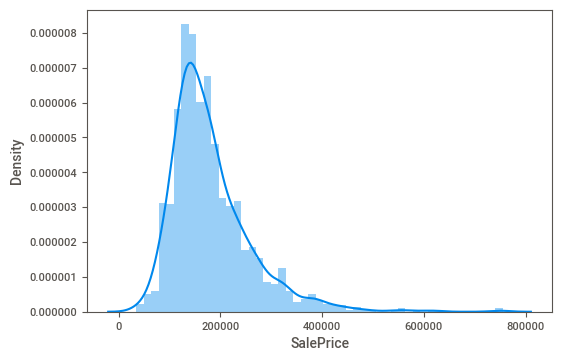

In [23]:
# Check for Target Variable

sns.distplot(house.SalePrice)
plt.show()

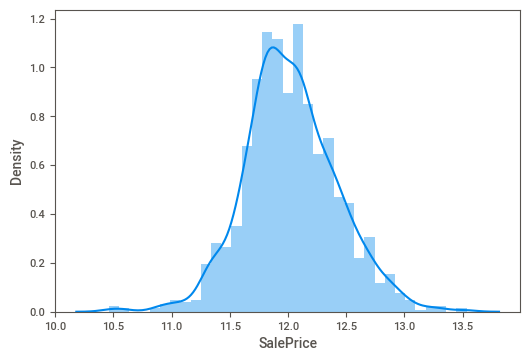

In [24]:
# Need to transform the target variable using np.log since there is skewness in the target variable:
house['SalePrice']= np.log(house.SalePrice)

sns.distplot(house['SalePrice'])
plt.show()

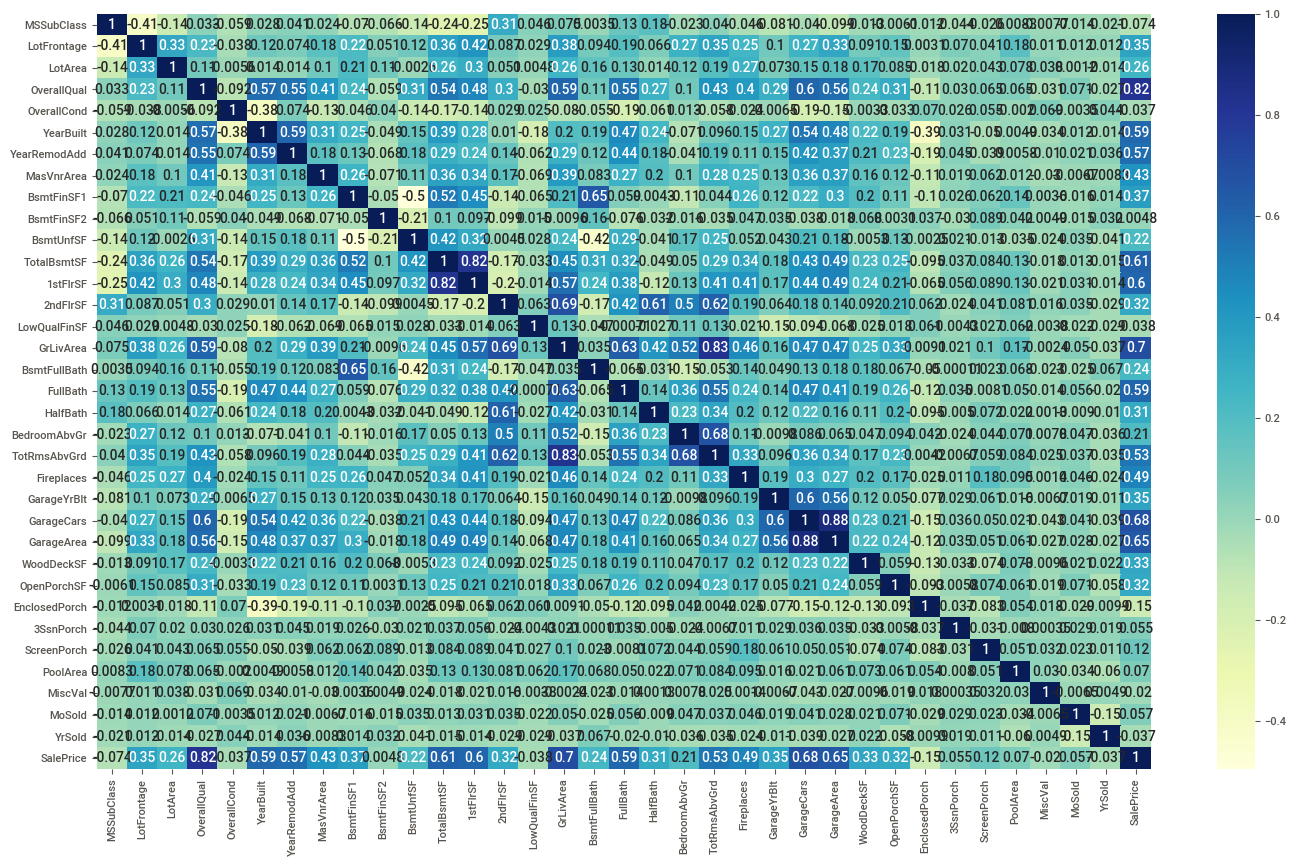

In [25]:
plt.figure(figsize=[17,10])
sns.heatmap(house.corr(), annot=True, cmap='YlGnBu')
plt.show()

# Step 2: Data Preparation

**Handling object type for categorical columns**

The below columns are correctly labeled with LABEL Encoding.
MSSubClass, ,OverallQual, OverallCond, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars

In [26]:
house['MSSubClass']=house['MSSubClass'].astype('object')

**Handling Date and Year Columns**

We have 4 Year columns and 1 month column. We can drop the month column. The Max date for all the 4 year column comes out to be 2010

In [27]:
house['AgeBuilt']=2010-house.YearBuilt
house['AgeGarageBlt']=2010-house.GarageYrBlt
house['AgeRemod']=2010-house.YearRemodAdd
house['AgeSold']=2010-house.YrSold

In [28]:
# Hnadling the Age for Garage where there was no garage build
house.loc[house['AgeGarageBlt']>200,'AgeGarageBlt']=0

In [29]:
# Dropping Month and the Year columns
house.drop(['YearBuilt','GarageYrBlt','YearRemodAdd','YrSold','MoSold'], axis=1, inplace=True)

**Creating Dummy Variables and storing result in a dummy data frame called dummy_col**

In [30]:
col= list(house.select_dtypes('object').columns)

In [31]:
dummy_col= pd.get_dummies(house[col],drop_first=True)

In [32]:
dummy_col.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Norm,Condition1_Others,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No,FireplaceQu_Po,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_Others,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Others,GarageQual_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,SaleType_Others,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0


In [33]:
house=pd.concat([house,dummy_col],axis=1)

In [34]:
house.drop(col,axis=1,inplace=True)

#### Split Data into Train and Test

In [35]:
X=house.drop('SalePrice',axis=1)
y=house['SalePrice']

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100,test_size=0.2)

In [37]:
X_train.shape , y_train.shape

((1168, 180), (1168,))

In [38]:
X_test.shape , y_test.shape

((292, 180), (292,))

#### Data Scaling

Get the columns to be scaled using the dummy_col dataframe created in data preparation. We use the dummy_col dataframe only as we dont want to scale the binary variables.

In [39]:
col=list(house.drop(dummy_col.columns,axis=1).columns)
col.remove('SalePrice')

In [40]:
# Scale Train Data

scaler=MinMaxScaler()
X_train[col]=scaler.fit_transform(X_train[col])

In [41]:
# Scale Test Data

X_test[col]=scaler.transform(X_test[col])

## Step 3: Modelling and Evalution

Setting up a list to store all the metrics calculated by the function to evaluate the r2score, RSS and Mean squared error

In [42]:
eval_metric = []

In [43]:
def model_eval(model):
    metric = []
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    r2_train_model = r2_score(y_train, y_pred_train)
    print('R2_train Score: ',r2_train_model)
    metric.append(r2_train_model)

    r2_test_model = r2_score(y_test, y_pred_test)
    print('R2_test Score: ',r2_test_model)
    metric.append(r2_test_model)

    rss1_model = np.sum(np.square(y_train - y_pred_train))
    print('RSS_Train: ', rss1_model)
    metric.append(rss1_model)

    rss2_model = np.sum(np.square(y_test - y_pred_test))
    print('RSS_Test: ',rss2_model)
    metric.append(rss2_model)

    mse_train_model = mean_squared_error(y_train, y_pred_train)
    print('MSE_Train: ', mse_train_model)
    metric.append(mse_train_model**0.5)

    mse_test_model = mean_squared_error(y_test, y_pred_test)
    print('MSE_Test: ',mse_test_model)
    metric.append(mse_test_model**0.5)
    eval_metric.append(metric)
    return y_pred_train,y_pred_test

### Ridge Regression (L2 Regularization)

Perform Hyper-parameter Tuning for the Lambda (or Alpha) for the Rigde Regression

In [44]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [45]:
print(model_cv.best_params_)

{'alpha': 4.0}


In [46]:
# Get the results of GridSearchCV in a DataFrame to get the best alpha value for Ridge
ridge_df = pd.DataFrame(model_cv.cv_results_)

In [47]:
ridge_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010162,0.010868,0.004763,0.006305,0.0001,{'alpha': 0.0001},0.847408,0.883969,0.802119,0.863297,0.904751,0.860309,0.034918,23,0.929752,0.920851,0.934293,0.924886,0.917299,0.925416,0.006076
1,0.003132,0.006264,0.003131,0.006262,0.001,{'alpha': 0.001},0.847458,0.884009,0.802123,0.863382,0.904754,0.860345,0.034921,22,0.929752,0.920851,0.934293,0.924886,0.917299,0.925416,0.006076
2,0.012500,0.006409,0.000000,0.000000,0.01,{'alpha': 0.01},0.847946,0.884400,0.802155,0.864193,0.904779,0.860695,0.034949,21,0.929750,0.920849,0.934292,0.924882,0.917297,0.925414,0.006077
3,0.007623,0.008196,0.003154,0.006308,0.05,{'alpha': 0.05},0.849877,0.885965,0.802312,0.867228,0.904760,0.862028,0.035042,20,0.929697,0.920813,0.934271,0.924812,0.917253,0.925369,0.006081
4,0.004515,0.006172,0.005653,0.005217,0.1,{'alpha': 0.1},0.851868,0.887594,0.802534,0.870152,0.904551,0.863340,0.035106,19,0.929567,0.920719,0.934216,0.924647,0.917145,0.925259,0.006093


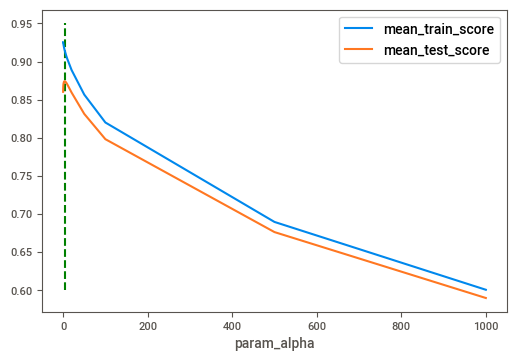

In [48]:
ridge_df.groupby('param_alpha')['mean_train_score','mean_test_score'].mean().plot()
plt.vlines(x=4, ymin=0.6,ymax=0.95, color='g',linestyle='--')
plt.show()

#### Residual Analysis, Homoscedasticity, Linear Relationship Check¶

In [49]:
# As seen from above we get best value when alpha is 4
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
y_pred_train,y_pred_test=model_eval(ridge)

R2_train Score:  0.9116502632226785
R2_test Score:  0.8923804807363783
RSS_Train:  16.126216212144875
RSS_Test:  5.410157223425957
MSE_Train:  0.013806691962452804
MSE_Test:  0.018527935696664236


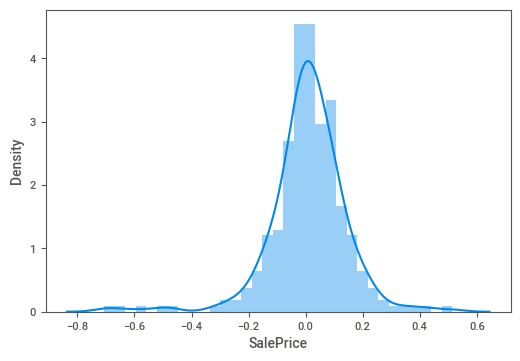

In [50]:
# Residual Analysis
sns.distplot(y_test-y_pred_test)
plt.show()

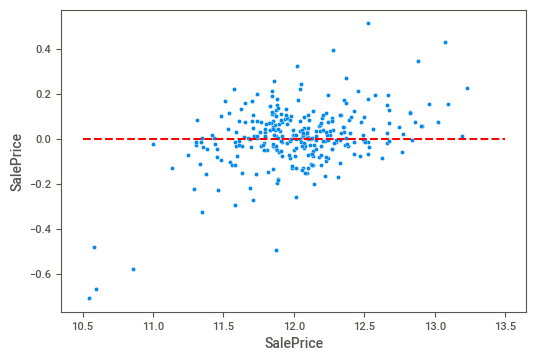

In [51]:
# Homoscedasticity Check
sns.scatterplot(y_test,y_test-y_pred_test)
plt.hlines(y=0, xmin=10.5,xmax=13.5, color='r',linestyle='--')
plt.show()

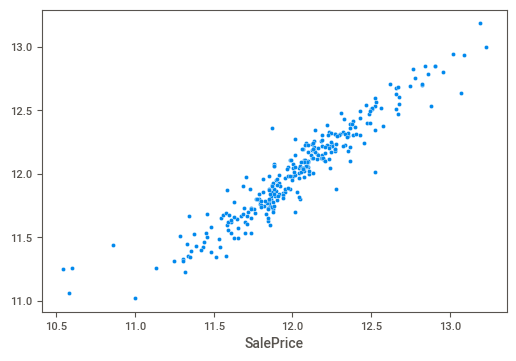

In [52]:
# Linear Relationship Check
sns.scatterplot(y_test,y_pred_test)
plt.show()

As seen from Ridge Regression, we can see that it clearly performs much better than Logistic Regression and Linear Regression

### Lasso Regression

Perform Hyper-parameter Tuning for the Lambda (or Alpha) for the Lasso Regression

In [53]:
params = {'alpha': [0.0005,0.003, 0.0002, 0.0001,0.004,0.0006, 0.00009, 0.008, 0.001]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0005, 0.003, 0.0002, 0.0001, 0.004, 0.0006,
                                   9e-05, 0.008, 0.001]},
             return_train_score=True, scoring='r2', verbose=1)

In [54]:
print(model_cv.best_params_)

{'alpha': 0.0005}


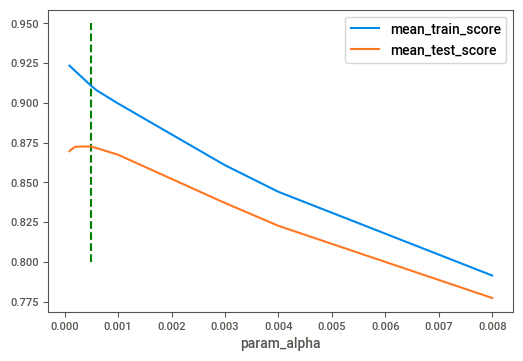

In [55]:
# Get the results of GridSearchCV in a DataFrame to get the best alpha value for Lasso

lasso_df = pd.DataFrame(model_cv.cv_results_)
lasso_df.groupby('param_alpha')['mean_train_score','mean_test_score'].mean().plot()
plt.vlines(x=0.0005, ymin=0.8,ymax=0.95, color='g',linestyle='--')
plt.show()

As seen from above we get best value when alpha is at 0.0005

In [56]:
alpha = .0005
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
y_pred_train,y_pred_test=model_eval(lasso)

R2_train Score:  0.9062162185147539
R2_test Score:  0.8991610824504152
RSS_Train:  17.118076324725862
RSS_Test:  5.06928856322956
MSE_Train:  0.014655887264320088
MSE_Test:  0.01736057727133411


#### Residual Analysis, Homoscedasticity, Linear Relationship Check

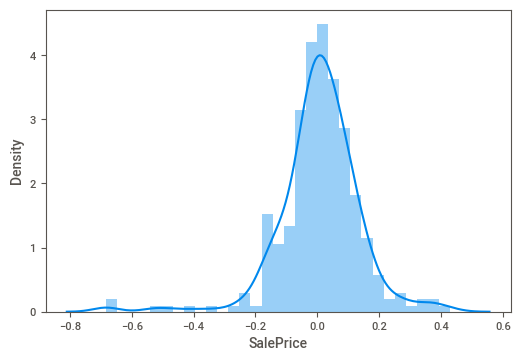

In [57]:
# Residual Analysis
sns.distplot(y_test-y_pred_test)
plt.show()

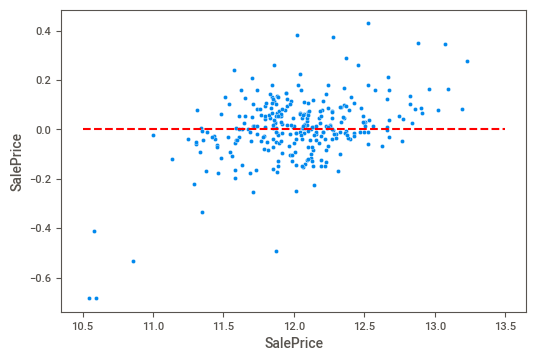

In [58]:
# Homoscedasticity Check
sns.scatterplot(y_test,y_test-y_pred_test)
plt.hlines(y=0, xmin=10.5,xmax=13.5, color='r',linestyle='--')
plt.show()

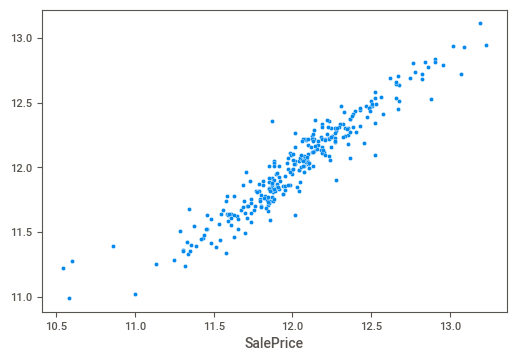

In [59]:
# Linear Relationship Check
sns.scatterplot(y_test,y_pred_test)
plt.show()

### Performance Checks

In [60]:
eval_table=pd.DataFrame(eval_metric).transpose()
eval_table.index=['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
eval_table.columns=['Ridge Regression',
                    'Lasso Regression']
eval_table

,Ridge Regression,Lasso Regression
R2 Score (Train),0.911650,0.906216
R2 Score (Test),0.892380,0.899161
RSS (Train),16.126216,17.118076
RSS (Test),5.410157,5.069289
MSE (Train),0.117502,0.121062
MSE (Test),0.136117,0.131760


We can see that Lasso Regression works better

### Betas Coefecient Checks

In [61]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [62]:
pd.set_option('display.max_rows', None)
betas.head(500)

,Ridge,Lasso
LotFrontage,-0.035374,-0.000000
LotArea,0.112837,0.019250
OverallQual,0.317585,0.499910
OverallCond,0.225566,0.283481
MasVnrArea,0.019983,0.000000
BsmtFinSF1,0.055392,0.000000
BsmtFinSF2,0.063766,0.000000
BsmtUnfSF,0.053970,0.003505
TotalBsmtSF,0.087185,0.000000
1stFlrSF,0.221329,0.064055


#### Top Coeffcient for Ridge Regression

In [63]:
pd.DataFrame({'Ridge':betas.Ridge,'Magnitude':betas.Ridge.abs()}).sort_values('Magnitude', ascending=False)

,Ridge,Magnitude
OverallQual,0.317585,0.317585
GrLivArea,0.251908,0.251908
OverallCond,0.225566,0.225566
1stFlrSF,0.221329,0.221329
TotRmsAbvGrd,0.170152,0.170152
2ndFlrSF,0.168984,0.168984
FullBath,0.158048,0.158048
GarageCars,0.152582,0.152582
MSZoning_FV,0.134100,0.134100
Neighborhood_StoneBr,0.134068,0.134068


### Top 5 Coefficient for Ridge Regression:

1.	OverallQual	0.316395
2.	GrLivArea	0.257206
3.	1stFlrSF	0.226597
4.	OverallCond	0.225263
5.	TotRmsAbvGrd	0.170152

#### Top Coeffcient for Lasso Regression
We need to check for the magnitude rather than the value for coefficient

In [64]:
pd.DataFrame({'Lasso':betas.Lasso,'Magnitude':betas.Lasso.abs()}).sort_values('Magnitude', ascending=False)

,Lasso,Magnitude
GrLivArea,0.885173,0.885173
OverallQual,0.499910,0.499910
OverallCond,0.283481,0.283481
GarageCars,0.221291,0.221291
BsmtFullBath,0.143573,0.143573
AgeBuilt,-0.133288,0.133288
TotRmsAbvGrd,0.128053,0.128053
Neighborhood_Crawfor,0.118750,0.118750
FullBath,0.111829,0.111829
Neighborhood_StoneBr,0.110995,0.110995


### Top 5 Features in Lasso Regression

1.	GrLivArea	0.885173
2.	OverallQual	0.49991
3.	OverallCond	0.283481
4.	GarageCars	0.221291
5.	BsmtFullBath	0.143573

### Subjective Question 1: Double the Alpha value and find the important predictors

In [65]:
# Doubling Alpha Value for RIDGE to 8
ridge_2=Ridge(alpha=8)

ridge_2.fit(X_train, y_train)
y_pred_train = ridge_2.predict(X_train)
y_pred_test = ridge_2.predict(X_test)

r2_train_model = r2_score(y_train, y_pred_train)
print('R2_train Score: ',r2_train_model)


r2_test_model = r2_score(y_test, y_pred_test)
print('R2_test Score: ',r2_test_model)



R2_train Score:  0.9056058482446037
R2_test Score:  0.8861163614956908


In [66]:
pd.DataFrame({'Ridge':ridge_2.coef_,'Magnitude':abs(ridge_2.coef_)}, 
                         index=X_train.columns).sort_values('Magnitude', ascending=False)

,Ridge,Magnitude
OverallQual,0.272845,0.272845
GrLivArea,0.203055,0.203055
OverallCond,0.184440,0.184440
1stFlrSF,0.175308,0.175308
TotRmsAbvGrd,0.169151,0.169151
FullBath,0.153074,0.153074
2ndFlrSF,0.143278,0.143278
GarageCars,0.138385,0.138385
Neighborhood_StoneBr,0.111702,0.111702
MSSubClass_30,-0.110315,0.110315


In [67]:
# Doubling Alpha Value for LASSO to 0.001
lasso_2=Lasso(alpha=0.001)

lasso_2.fit(X_train, y_train)
y_pred_train = lasso_2.predict(X_train)
y_pred_test = lasso_2.predict(X_test)

r2_train_model = r2_score(y_train, y_pred_train)
print('R2_train Score: ',r2_train_model)


r2_test_model = r2_score(y_test, y_pred_test)
print('R2_test Score: ',r2_test_model)

R2_train Score:  0.8961340171752619
R2_test Score:  0.8922483011061014


In [68]:
pd.DataFrame({'Lasso':lasso_2.coef_,'Magnitude':abs(lasso_2.coef_)}, 
                         index=X_train.columns).sort_values('Magnitude', ascending=False)

,Lasso,Magnitude
GrLivArea,0.785663,0.785663
OverallQual,0.573998,0.573998
OverallCond,0.233007,0.233007
GarageCars,0.222338,0.222338
BsmtFullBath,0.132346,0.132346
TotRmsAbvGrd,0.127332,0.127332
Neighborhood_Crawfor,0.107607,0.107607
MSSubClass_30,-0.096672,0.096672
FullBath,0.092047,0.092047
Neighborhood_NridgHt,0.091399,0.091399


### After Doubling the Alpha values, the Top 5 important features for:

**Ridge:**
1.	OverallQual	0.272845
2.	GrLivArea	0.203055
3.	OverallCond	0.18444
4.	1stFlrSF	0.175308
5.	TotRmsAbvGrd	0.169151



**Lasso:**
1.	GrLivArea	0.785663
2.	OverallQual	0.573998
3.	OverallCond	0.233007
4.	GarageCars	0.222338
5.	BsmtFullBath	0.132346

## Subjective Question 3: Removing the Top 5 Features and creating the Lasso model again

In [69]:
X_Lasso= X.drop(['GrLivArea','OverallQual','OverallCond','GarageCars','BsmtFullBath'], axis=1)

In [70]:
# Again Performing Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X_Lasso,y,random_state=100,test_size=0.2)

In [71]:
X_train.shape , y_train.shape

((1168, 175), (1168,))

In [72]:
X_test.shape , y_test.shape

((292, 175), (292,))

We can see five columns are dropped now. Now we would again use the dummy_col DataFrame to scale the model.
In addition, we need to remove the other variables that had been dropped too before scaling.

In [73]:
col=list(house.drop(dummy_col.columns,axis=1).columns)
col.remove('SalePrice')
col.remove('GrLivArea')
col.remove('OverallQual')
col.remove('GarageCars')
col.remove('OverallCond')
col.remove('BsmtFullBath')
col

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'AgeBuilt',
 'AgeGarageBlt',
 'AgeRemod',
 'AgeSold']

In [74]:
# Scale Train Data
scaler=MinMaxScaler()
X_train[col]=scaler.fit_transform(X_train[col])

# Scale Test Data
X_test[col]=scaler.transform(X_test[col])

#### Model Building
Again the Aplha paaramter need to be tuned

In [75]:
params = {'alpha': [0.0005,0.003, 0.0002, 0.0001,0.004,0.0006, 0.00009, 0.008, 0.001]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0005, 0.003, 0.0002, 0.0001, 0.004, 0.0006,
                                   9e-05, 0.008, 0.001]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [76]:
print(model_cv.best_params_)

{'alpha': 0.0002}


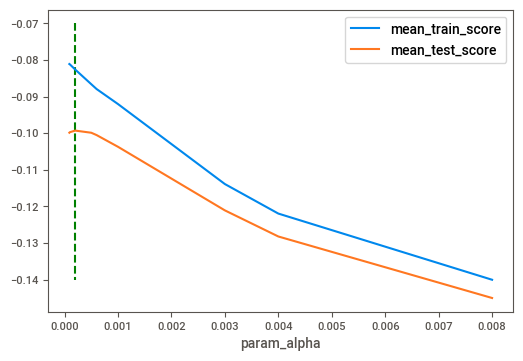

In [77]:
# Get the results of GridSearchCV in a DataFrame to get the best alpha value for Lasso

lasso_df = pd.DataFrame(model_cv.cv_results_)
lasso_df.groupby('param_alpha')['mean_train_score','mean_test_score'].mean().plot()
# plt.vlines(x=100, ymax=-35000, ymin=-15000, colors="r", linestyles="--")
plt.vlines(x=0.0002, ymax=-0.14, ymin=-0.07, colors="g", linestyles="--")
plt.show()

In [78]:
# From previous, models choosing the alpha value as 100 only

alpha = 0.0002
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)


y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_model = r2_score(y_train, y_pred_train)
print('R2_train Score: ',r2_train_model)


r2_test_model = r2_score(y_test, y_pred_test)
print('R2_test Score: ',r2_test_model)


R2_train Score:  0.9033511025282231
R2_test Score:  0.8710755591149948


In [79]:
# Top 5 Coefficients now
# We need to check for the magnitude rather than the value for coefficient

pd.DataFrame({'Lasso':lasso.coef_,'Magnitude':abs(lasso.coef_)}, 
                         index=X_Lasso.columns).sort_values('Magnitude', ascending=False)

,Lasso,Magnitude
1stFlrSF,0.854207,0.854207
2ndFlrSF,0.408671,0.408671
MSZoning_FV,0.339940,0.339940
MSZoning_RL,0.298723,0.298723
MSZoning_RH,0.274798,0.274798
MSZoning_RM,0.270868,0.270868
LotArea,0.246072,0.246072
GarageArea,0.240739,0.240739
Neighborhood_StoneBr,0.179356,0.179356
Neighborhood_MeadowV,-0.163457,0.163457


# Final Result

### Evaluation without Scaling on Target Variable (SalePrice)

### Ridge Model: 

Best Aplha Value= 4

**Top 5 Features from the Ridge model along with its coefficients:**
1.	OverallQual	0.316395
2.	GrLivArea	0.257206
3.	1stFlrSF	0.226597
4.	OverallCond	0.225263
5.	TotRmsAbvGrd	0.170152

R2 Score (Train)	0.91165
R2 Score (Test)	    0.89238


### LASSO Model: 

Best Alpha Value = 0.0005

**Top 5 Features from the Lasso model along with its coefficients:**
1.	GrLivArea	0.885173
2.	OverallQual	0.49991
3.	OverallCond	0.283481
4.	GarageCars	0.221291
5.	BsmtFullBath	0.143573

R2 Score (Train)	0.906216
R2 Score (Test)	    0.899161



### Question 1

#### After Doubling the Alpha values, the Top 5 important features for:

**Ridge (Alpha= 8):**
1.	OverallQual	0.272845
2.	GrLivArea	0.203055
3.	OverallCond	0.18444
4.	1stFlrSF	0.175308
5.	TotRmsAbvGrd	0.169151

R2_train Score:  0.9056058482446037
R2_test Score:  0.8861163614956908


**Lasso (Alpha= 0.001):**
1.	GrLivArea	0.785663
2.	OverallQual	0.573998
3.	OverallCond	0.233007
4.	GarageCars	0.222338
5.	BsmtFullBath	0.132346

R2_train Score:  0.8961340171752619
R2_test Score:  0.8922483011061014


### Question 3

#### When we drop the top 5 features from Lasso Model, we again get the new aplha value as ***0.0002*** on Lasso

**Top 5 Features post dropping the above features**
1.	1stFlrSF	0.854207
2.	2ndFlrSF	0.408671
3.	MSZoning_FV	0.33994
4.	MSZoning_RL	0.298723
5.	MSZoning_RH	0.274798

R2_train Score:  0.9033511025282231
R2_test Score:  0.8710755591149948